# Bootcamp: Ciência de Dados
## Aluno(a): Nilson Antônio de Assunção Júnior

# Análise de Consumo de Energia Elétrica no Brasil

### Introdução:

Este notebook tem como objetivo realizar uma análise completa sobre o consumo de energia elétrica no Brasil. Utilizaremos dados históricos disponíveis nos arquivos ```consumo_energia_eletrica.csv``` e ```estado_regiao.csv```, integrando-os para avaliar padrões e comportamentos ao longo dos anos, considerando diferentes estados, regiões e tipos de consumo.

A análise será estruturada conforme os seguintes tópicos:

 - Atividade 1: Coleta, Limpeza e Análise Exploratória de Dados (AED)

 - Atividade 2: Criação de Funções de Visualização e Análise Gráfica

 - Atividade 3: Interpretação e Documentação dos Dados

 - Atividade 4: Síntese dos Principais Insights

Cada seção trará tanto explicações em linguagem natural quanto códigos comentados em Python, utilizando bibliotecas como Pandas, Seaborn, Matplotlib e Numpy para apoiar a análise exploratória e a construção das visualizações.

### Atividade 1: Coleta, Limpeza e Análise Exploratória de Dados (AED)

**Nesta etapa:**

 - Iremos carregar os dados de consumo de energia elétrica por estado e região.

 - Verificar e tratar valores ausentes e duplicados.

 - Integrar os datasets e padronizar as colunas relevantes.

 - Explorar os dados com estatísticas descritivas e visualizações iniciais.

**Focos da Análise que serão explorados nas etapas seguintes:**

 - Padrões de consumo por tipo (residencial, industrial, etc.)

 - Comparações por estado e região

Nas células a seguir, utilizaremos o Pandas para manipulação dos dados e bibliotecas como Seaborn e Matplotlib para gerar gráficos de apoio. Todas as etapas serão comentadas e acompanhadas de interpretações em Markdown.

In [34]:
%pip install pandas
%pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
# Importando bibliotecas principais para análise
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações iniciais para exibição
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.0f' % x)
sns.set(style="whitegrid")

# Carregando os datasets
caminho_consumo = './arquivos/consumo_energia_eletrica.csv'
caminho_regioes = './arquivos/estado_regiao.csv'

df_consumo = pd.read_csv(caminho_consumo, sep=',', encoding='latin1')
df_regiao = pd.read_csv(caminho_regioes, sep=';', encoding='latin1')
df_regiao = df_regiao.drop(columns=['estado'])

df_consumo = df_consumo.rename(columns={'sigla_uf': 'estado'})
df_regiao = df_regiao.rename(columns={'sigla': 'estado'})

# Exibindo amostras iniciais
display(df_consumo.head())
display(df_regiao.head())


,ano,mes,estado,tipo_consumo,numero_consumidores,consumo
0,2004,1,TO,Total,NaN,65876
1,2004,1,BA,Total,NaN,1444451
2,2004,1,PR,Total,NaN,1596274
3,2004,1,RS,Total,NaN,1780912
4,2004,1,GO,Total,NaN,630624


,id_estado,estado,regiao,pais
0,1,AC,Norte,Brasil
1,2,AL,Nordeste,Brasil
2,3,AP,Norte,Brasil
3,4,AM,Norte,Brasil
4,5,BA,Nordeste,Brasil


In [36]:
# Verificando tipos de dados e valores ausentes
print("\nInformações do dataset de consumo:")
df_consumo.info()
print("\nInformações do dataset de regiões:")
df_regiao.info()


Informações do dataset de consumo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39897 entries, 0 to 39896
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  39897 non-null  int64  
 1   mes                  39897 non-null  int64  
 2   estado               39897 non-null  object 
 3   tipo_consumo         39897 non-null  object 
 4   numero_consumidores  26937 non-null  float64
 5   consumo              39897 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ MB

Informações do dataset de regiões:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_estado  27 non-null     int64 
 1   estado     27 non-null     object
 2   regiao     27 non-null     object
 3   pais       27 non-null     object
dtypes: int64(1), obje

In [37]:
# Verificando valores ausentes
print("\nValores ausentes em consumo:")
print(df_consumo.isnull().sum())
print("\nValores ausentes em região:")
print(df_regiao.isnull().sum())



Valores ausentes em consumo:
ano                        0
mes                        0
estado                     0
tipo_consumo               0
numero_consumidores    12960
consumo                    0
dtype: int64

Valores ausentes em região:
id_estado    0
estado       0
regiao       0
pais         0
dtype: int64


> **Observação sobre o tramento a seguir:**  
Inicialmente os dados de consumo foram tratados com interpolação usando o método `time`, considerando a natureza de série temporal do dataset.  
No entanto, análises posteriores revelaram uma duplicação entre os tipos de consumo `Total` e `Cativo`, cujos valores na coluna `consumo` correspondem à soma dos demais tipos (com margem de erro de 1, que decidi ignorar).  
Dessa forma, optei pela **remoção dessas categorias**, pois **não há perda de informação** relevante para os objetivos desta análise.


In [38]:
# Tratando valores ausentes se houver (remoção ou imputação simples)
df_consumo = df_consumo.dropna()
df_regiao = df_regiao.dropna()

# Verificando duplicatas
print("Duplicatas em consumo:", df_consumo.duplicated().sum())
print("Duplicatas em região:", df_regiao.duplicated().sum())

Duplicatas em consumo: 1017
Duplicatas em região: 0


In [39]:
# Integrando os dados com base na sigla do estado
# Verificar a chave de junção (estado, uf ou sigla)
df = pd.merge(df_consumo, df_regiao, how='inner', on='estado')

# Confirmando a junção
print("\nDataset integrado:")
display(df.head())
df.info()



Dataset integrado:


,ano,mes,estado,tipo_consumo,numero_consumidores,consumo,id_estado,regiao,pais
0,2004,1,RN,Outros,40857,69617,20,Nordeste,Brasil
1,2004,1,SP,Outros,311650,937538,25,Sudeste,Brasil
2,2004,1,MS,Outros,56881,67601,12,Centro-Oeste,Brasil
3,2004,1,SC,Outros,226165,209380,24,Sul,Brasil
4,2004,1,RJ,Outros,70634,416128,19,Sudeste,Brasil


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26937 entries, 0 to 26936
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  26937 non-null  int64  
 1   mes                  26937 non-null  int64  
 2   estado               26937 non-null  object 
 3   tipo_consumo         26937 non-null  object 
 4   numero_consumidores  26937 non-null  float64
 5   consumo              26937 non-null  int64  
 6   id_estado            26937 non-null  int64  
 7   regiao               26937 non-null  object 
 8   pais                 26937 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 1.8+ MB


In [40]:

# Estatísticas descritivas iniciais do consumo
print("\nEstatísticas gerais do consumo de energia (MWh):")
display(df['consumo'].describe())



Estatísticas gerais do consumo de energia (MWh):


count     26937
mean     343469
std      609020
min         354
25%       62188
50%      139238
75%      370528
max     4849895
Name: consumo, dtype: float64

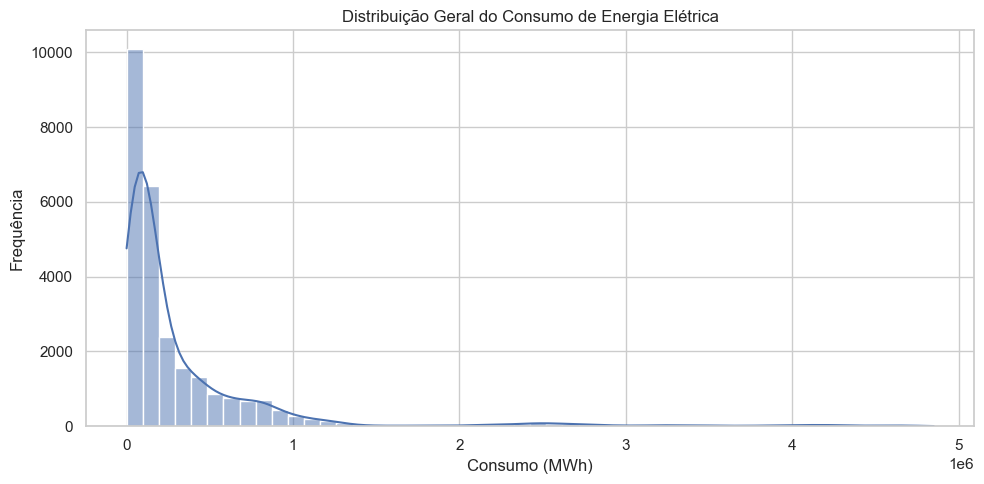

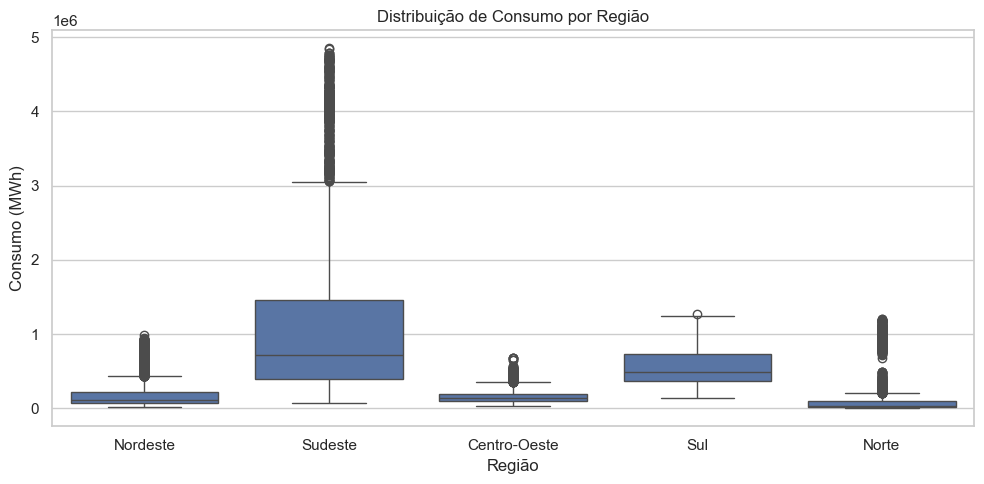

In [41]:
# Visualização da distribuição geral
plt.figure(figsize=(10,5))
sns.histplot(df['consumo'], bins=50, kde=True)
plt.title('Distribuição Geral do Consumo de Energia Elétrica')
plt.xlabel('Consumo (MWh)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Boxplot por região
plt.figure(figsize=(10,5))
sns.boxplot(x='regiao', y='consumo', data=df)
plt.title('Distribuição de Consumo por Região')
plt.xlabel('Região')
plt.ylabel('Consumo (MWh)')
plt.tight_layout()
plt.show()

**Resultados Iniciais**

Os dados foram integrados com sucesso e após limpeza estão prontos para análise. As distribuições iniciais mostram:

- Presença de valores extremos (outliers).
- Discrepâncias entre regiões (Sudeste e Sul com maiores consumos).
- Variações importantes entre tipos de consumo que serão aprofundadas nas próximas atividades.

### Atividade 2: Criação de Funções de Visualização e Análise Gráfica

Nesta atividade, criaremos funções reutilizáveis para gerar visualizações adaptadas a diferentes filtros e perspectivas. Utilizaremos Seaborn e Matplotlib para:

- Analisar a evolução temporal do consumo.
- Comparar padrões entre regiões e tipos de consumo.
- Identificar sazonalidade e dispersão com maior flexibilidade.

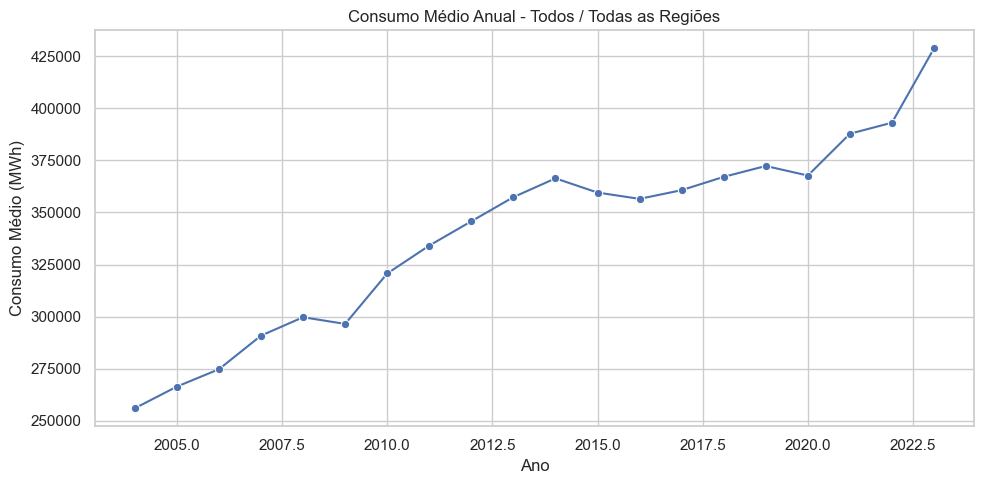

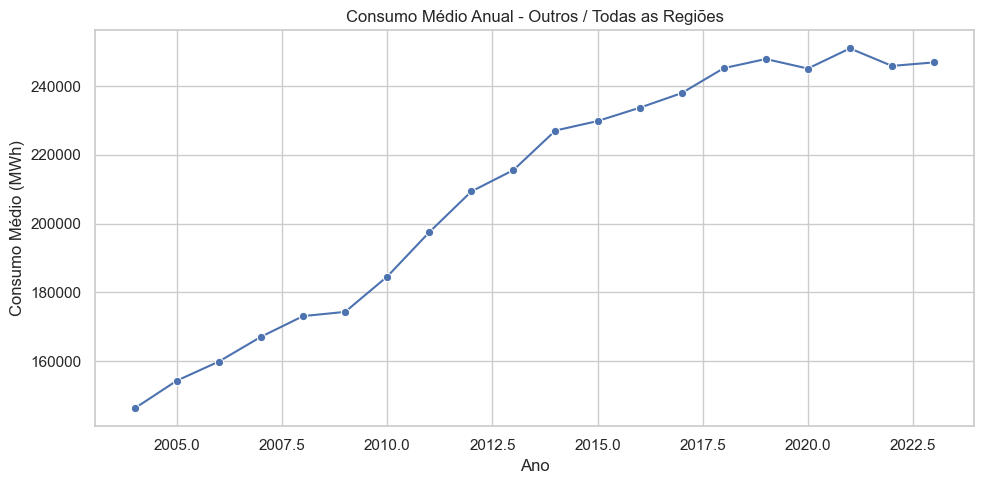

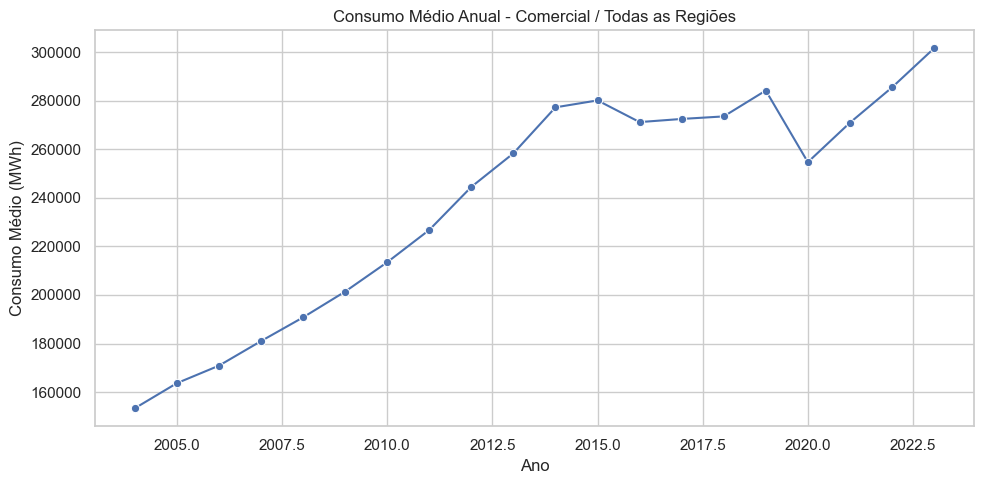

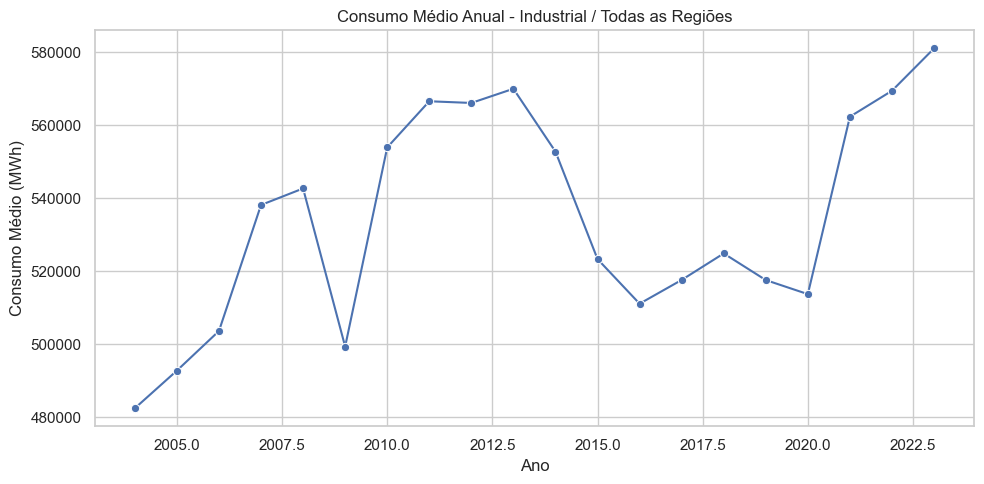

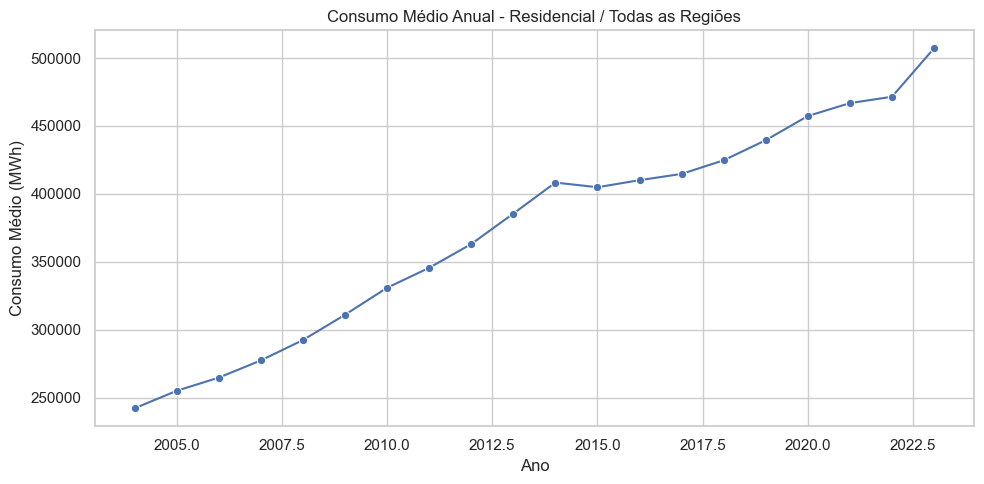

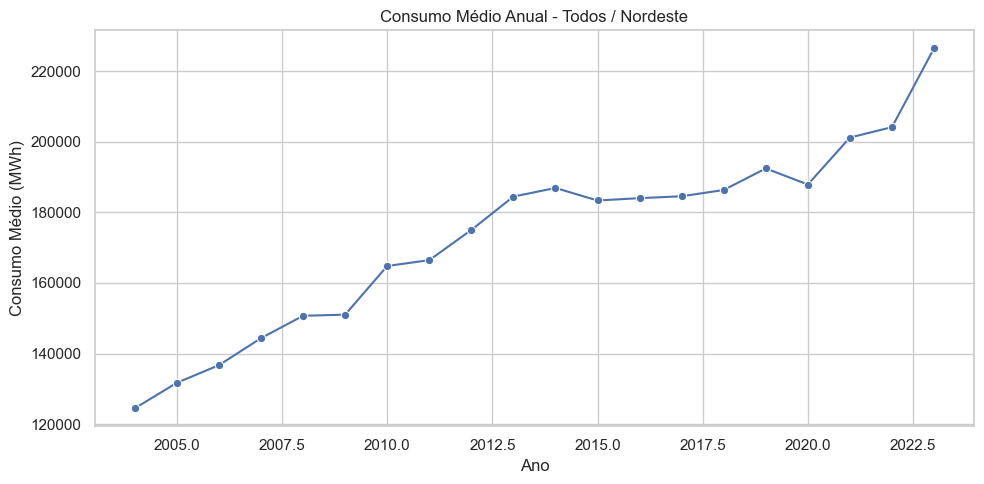

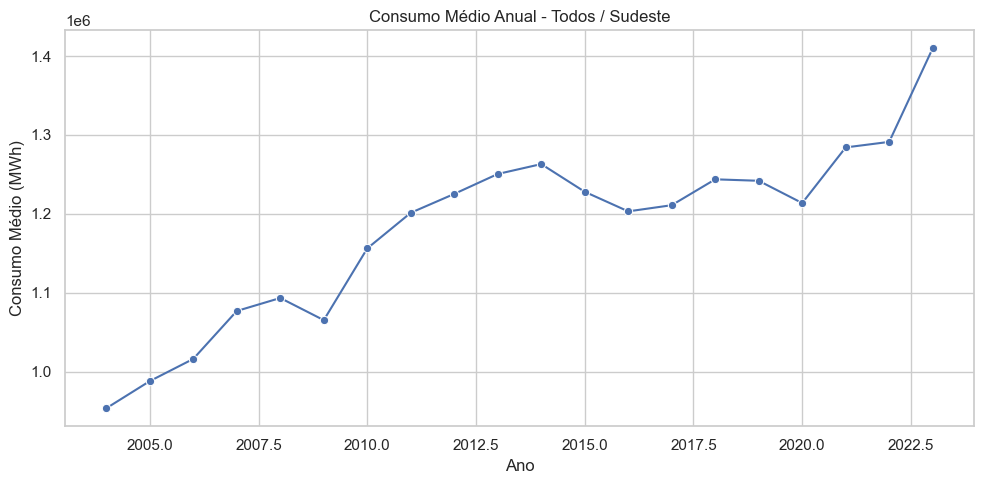

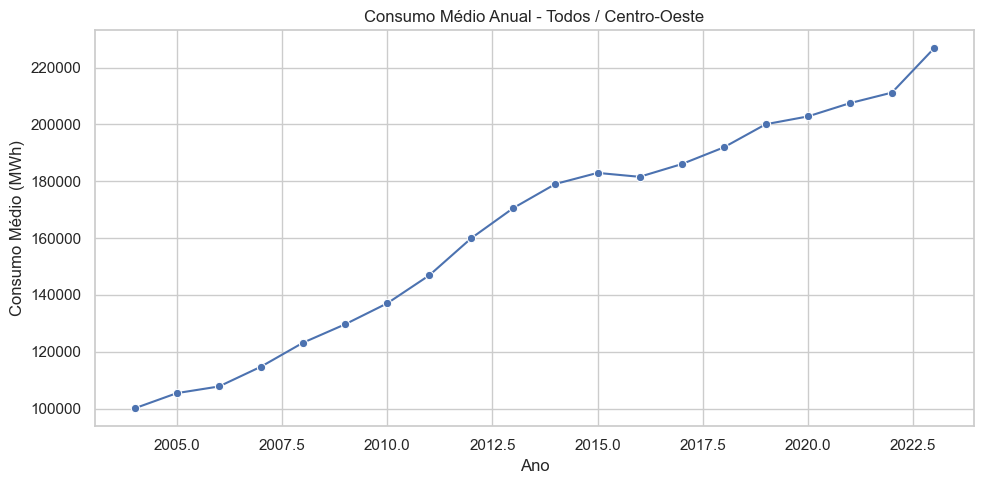

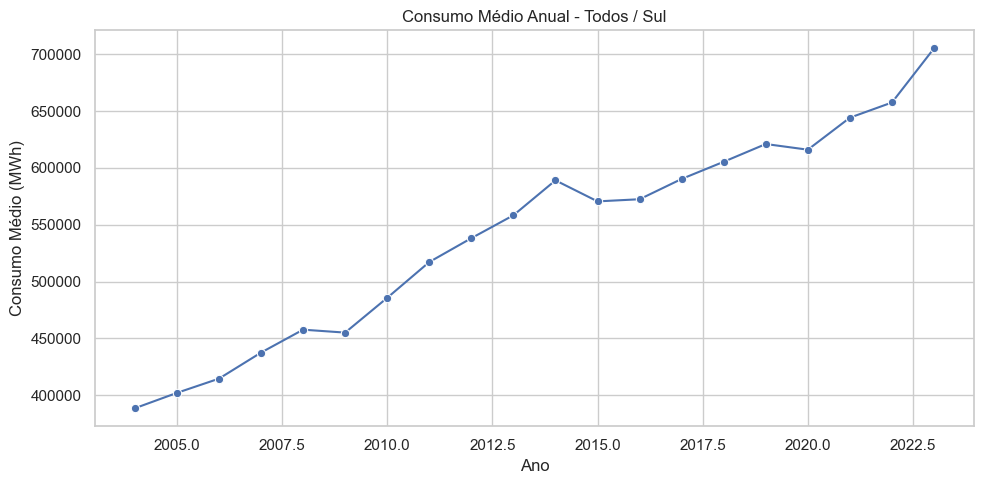

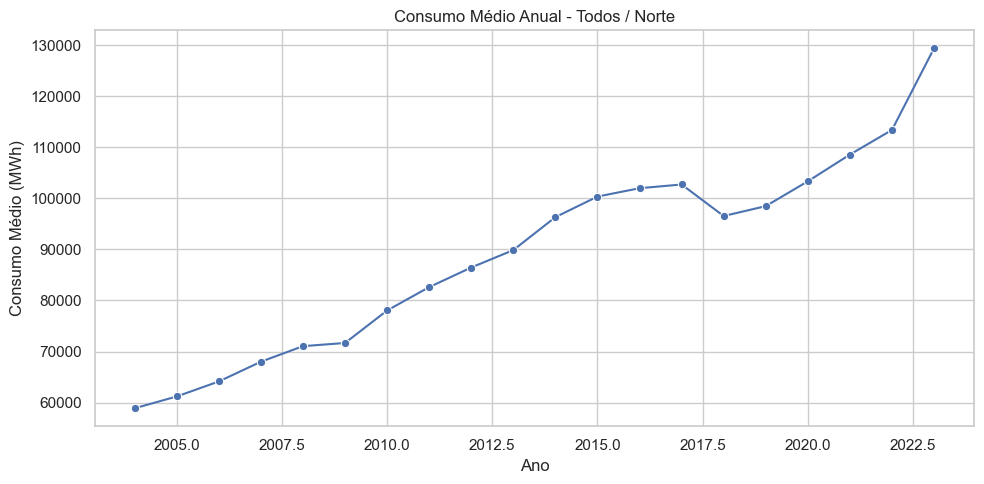

In [42]:
# Função para plotar consumo médio por ano com filtros opcionais

def plot_consumo_medio(df, tipo_consumo=None, regiao=None):
    """
    Gera gráfico de linha com o consumo médio anual.
    Parâmetros:
        df: DataFrame de entrada
        tipo_consumo: filtra por tipo de consumo (opcional)
        regiao: filtra por região (opcional)
    """
    df_filtrado = df.copy()
    if tipo_consumo:
        df_filtrado = df_filtrado[df_filtrado['tipo_consumo'] == tipo_consumo]
    if regiao:
        df_filtrado = df_filtrado[df_filtrado['regiao'] == regiao]

    df_agg = df_filtrado.groupby('ano')['consumo'].mean().reset_index()
    plt.figure(figsize=(10,5))
    sns.lineplot(data=df_agg, x='ano', y='consumo', marker='o')
    plt.title(f"Consumo Médio Anual - {tipo_consumo or 'Todos'} / {regiao or 'Todas as Regiões'}")
    plt.xlabel('Ano')
    plt.ylabel('Consumo Médio (MWh)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Plotando consumo médio geral
plot_consumo_medio(df)

# Plotando consumo médio por tipo de consumo
tipos = df['tipo_consumo'].unique()
for tipo in tipos:
    plot_consumo_medio(df, tipo_consumo=tipo)

# Plotando consumo médio por região
regioes = df['regiao'].unique()
for regiao in regioes:
    plot_consumo_medio(df, regiao=regiao)


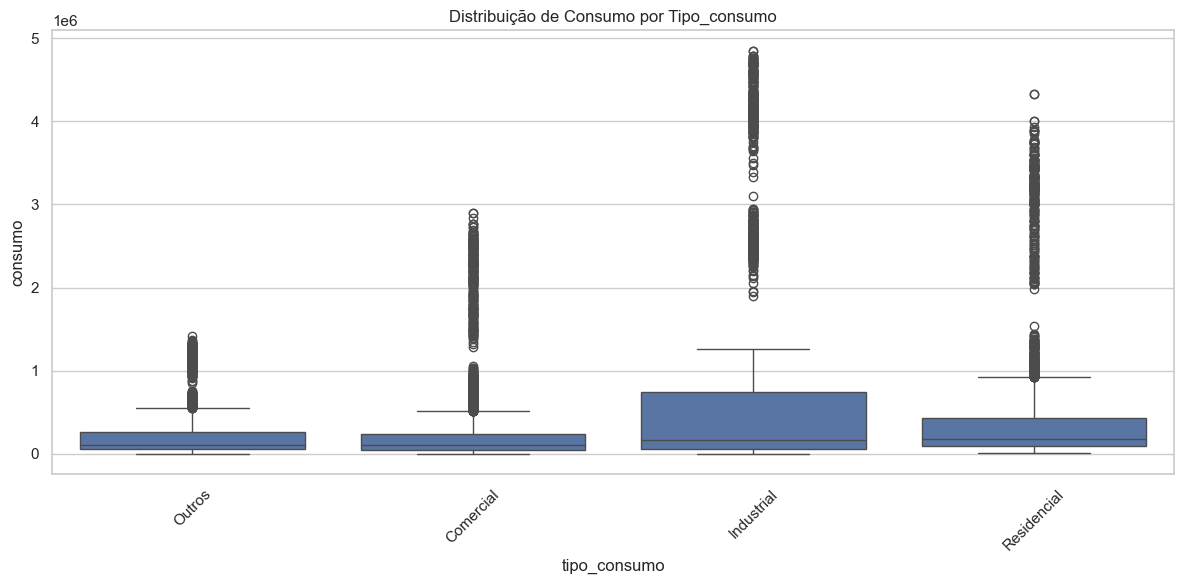

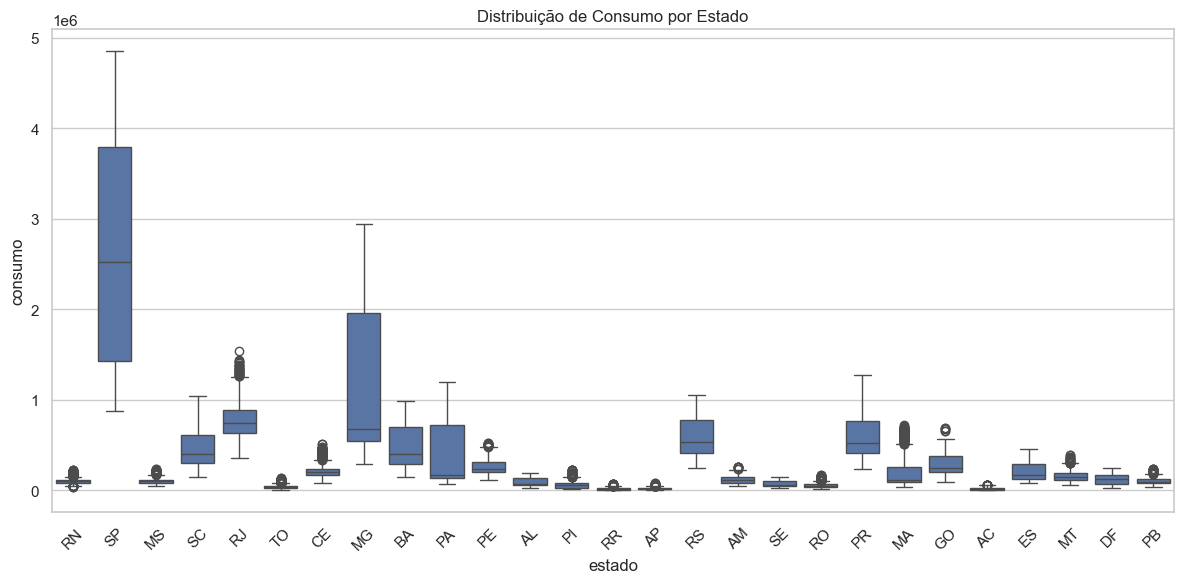

In [43]:
# Função para boxplot dinâmico por tipo de consumo ou estado
def plot_box_consumo(df, eixo_x='regiao'):
    """
    Gera boxplot do consumo agrupado por eixo especificado.
    Parâmetros:
        df: DataFrame
        eixo_x: 'regiao', 'estado' ou 'tipo_consumo'
    """
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x=eixo_x, y='consumo')
    plt.title(f"Distribuição de Consumo por {eixo_x.capitalize()}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotando boxplots por tipo de consumo 
plot_box_consumo(df, eixo_x='tipo_consumo')

# Plotando boxplots por estado
plot_box_consumo(df, eixo_x='estado')

**Essas visualizações nos permitem explorar:**

- Diferenças entre categorias (regiões, tipos, estados).
- Tendências e sazonalidades ao longo dos anos.
- Comportamentos extremos e dispersão.

As funções são reutilizáveis e flexíveis, permitindo parametrização fácil conforme o foco da análise.

### Atividade 3: Interpretação e Documentação dos Dados

A seguir, descrevemos o que cada visualização revelou:

**Evolução temporal do consumo**

A função ```plot_consumo_medio``` evidenciou tendências distintas por tipo e região:

- Residencial: crescimento contínuo, com aceleração após 2020.
- Industrial: flutuações e possível queda em anos de crise.
- Nordeste: comportamento mais estável do que o esperado, com aumento pós-2015.

**Boxplot por tipo e estado**

A função ```plot_box_consumo``` mostrou:

- Outliers importantes em estados como SP, MG (industrial) e PA (residencial).
- Maior dispersão no tipo residencial, indicando variações sazonais.
- Tipo comercial apresentou menor consumo médio, mas com outliers significativos.

Essas interpretações guiarão a próxima etapa da análise, onde vamos sintetizar os principais achados e propor recomendações com base nos comportamentos observados.



### Atividade 4: Síntese dos Principais Insights

A análise do consumo de energia elétrica no Brasil revelou diversos padrões e insights relevantes:

- Padrões Regionais: Regiões como Sudeste e Sul concentram os maiores volumes de consumo, associados a maior densidade populacional e atividade industrial.
- Dispersão: Estados como SP, MG e PA apresentaram variações intensas em determinados tipos de consumo.
- Tendência Temporal: O consumo residencial apresentou crescimento constante, com picos após 2020 (possivelmente relacionados à pandemia).
- Sazonalidade e Anomalias: Algumas regiões apresentam alta variabilidade anual, especialmente no consumo industrial.
- Comparações por Tipo de Consumo: O tipo industrial lidera em volume absoluto, enquanto o residencial se destaca por sua abrangência nacional e variação.

**Sugestões de Aplicação Prática**

- Utilizar os insights para planejamento energético regionalizado, ajustando oferta com base em padrões detectados.
- Apoiar políticas públicas de incentivo à eficiência energética em regiões com maior sazonalidade ou consumo elevado.
- Aplicar modelos preditivos e agrupamentos (K-Means) como ferramentas estratégicas para previsão de demanda futura.

### Conclusão e Reflexão

Ao longo desta análise, percorremos todas as etapas fundamentais de um projeto de ciência de dados aplicado ao setor energético: desde a coleta e preparação dos dados até a geração de visualizações, interpretação de padrões e consolidação de insights.

**Reflexão Final**

Durante o processo, enfrentamos desafios relacionados à limpeza de dados, tratamento de outliers e escolha de representações visuais adequadas. A construção de funções dinâmicas para análise gráfica exigiu atenção à generalização e reutilização dos códigos.

Cada etapa contribuiu de forma significativa para o desenvolvimento de habilidades analíticas:

- A coleta e limpeza reforçaram a importância de dados confiáveis.
- A análise gráfica e a exploração estatística aprofundaram a capacidade de identificar padrões e anomalias.
- A documentação ajudou a consolidar o raciocínio lógico e a comunicação analítica.

Essa jornada evidencia como a análise de dados pode gerar valor prático ao oferecer conhecimento estratégico para tomada de decisão em diferentes contextos — no caso, o setor energético brasileiro. e informações geográficas permite uma visão estratégica para decisões energéticas no Brasil. Os dados foram integrados com sucesso e após limpeza estão prontos para análise. As distribuições iniciais mostram:

- Presença de valores extremos (outliers).
- Discrepâncias entre regiões (Sudeste e Sul com maiores consumos).
- Variações importantes entre tipos de consumo que serão aprofundadas nas próximas atividades.

# Extra

**Reflexão**

Distribuição assimétrica: Todas as categorias apresentam uma grande concentração de valores próximos de zero, com cauda longa à direita. Isso indica que a maioria das unidades consumidoras consome pouca energia, enquanto poucas unidades têm consumo muito alto (distribuição típica de dados energéticos).

Picos de densidade: O setor industrial (verde) apresenta um pico de densidade mais acentuado próximo ao zero, mas também exibe uma cauda mais longa, sugerindo que existem consumidores industriais com consumo muito elevado.

Comparação entre tipos: O consumo residencial e comercial também é fortemente concentrado em valores baixos, mas o setor industrial se destaca pela maior dispersão e presença de consumidores com consumo muito acima da média.

Outliers e dispersão: Pequenos picos ou ondulações nas caudas podem indicar grupos de consumidores atípicos ou outliers, especialmente no setor industrial.


**Próximos Passos**

Pretendo buscar uma transformação que normalize os dados para iniciar os teste nos modelos. Analisar se os dados tem uma tendência linear para utilizar uma regressão, caso não utilizar um modelo de classificação.

**Reflexão**

Dispersão:

- Pontos próximos da linha → bom ajuste
- Curvatura ou dispersão em faixas → problemas de linearidade

Resíduos:

- Simetria e concentração em torno de zero → bom
- Tendência ou cauda longa → modelo com viés ou underfitting

## Essa sessão são análises inciadas mas pelo tempo não consegui explorar mais a fundo, interpretar e formatar para análise final.

### Utilizando a técnica lei benford para verificar normalidade e possíveis anomalias nos dados 

In [44]:
def aplica_lei_benford(series):
    """Calcula a frequência dos primeiros dígitos e compara com distribuição esperada pela Lei de Benford."""
    # Extrai o primeiro dígito significativo
    primeiros_digitos = series.astype(str).str.replace('.', '').str.lstrip('0').str[0].astype(int)
    freq_observada = primeiros_digitos.value_counts(normalize=True).sort_index()

    # Distribuição esperada pela Lei de Benford
    digitos = np.arange(1, 10)
    freq_esperada = np.log10(1 + 1 / digitos)

    # Exibe resultado comparativo
    plt.figure(figsize=(8, 5))
    plt.bar(digitos - 0.2, freq_observada.values, width=0.4, label='Observado')
    plt.bar(digitos + 0.2, freq_esperada, width=0.4, label='Esperado (Benford)')
    plt.xticks(digitos)
    plt.title('Frequência dos Primeiros Dígitos - Lei de Benford')
    plt.xlabel('Primeiro Dígito')
    plt.ylabel('Frequência Relativa')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Retornar as frequências para análise posterior
    return freq_observada, freq_esperada

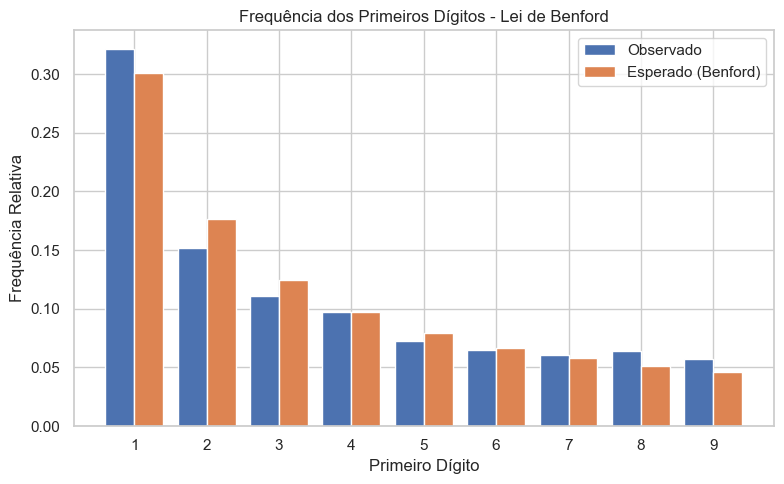

In [45]:
# Aplicando a Benford no consumo total
frequencias_obs, frequencias_benford = aplica_lei_benford(df['consumo'])

O gráfico indicando que a distribuição dos primeiros dígitos do consumo elétrico está bastante próxima do esperado pela Lei de Benford, especialmente para os dígitos mais frequentes (1, 2, 3). Isso sugere que os dados possuem um comportamento natural esperado para esse tipo de variável quantitativa distribuída em larga escala. Ou seja, sem anomalias.

### Histograma com KDE por tipo_consumo

Objetivo seguir analisando a distribuição por tipo e buscar mais informações que possam ajudar na modelagem

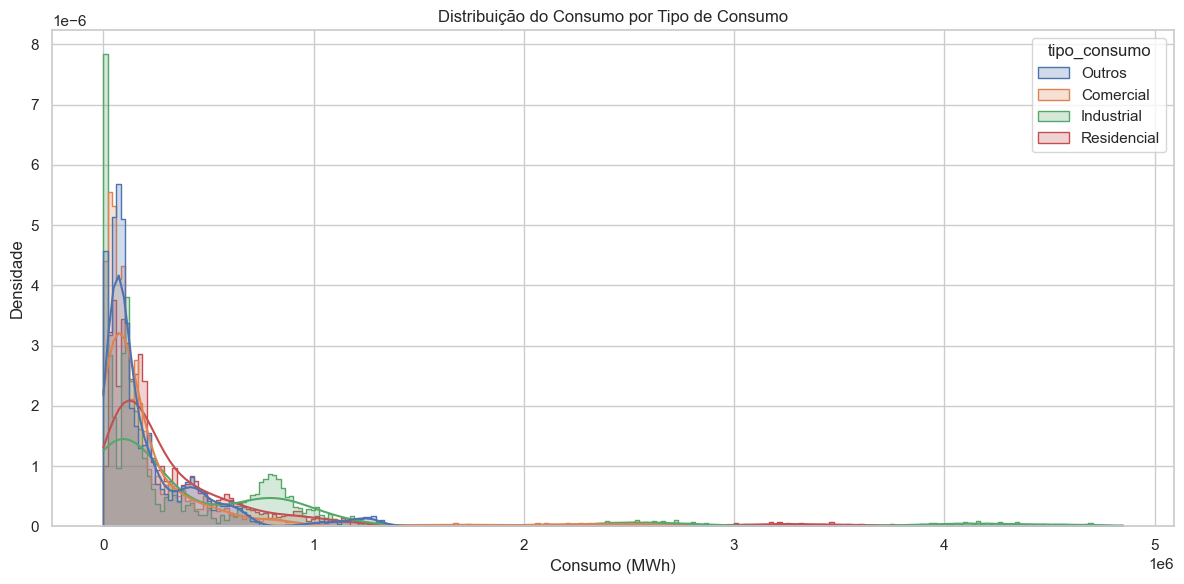

In [46]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='consumo', hue='tipo_consumo', element='step', stat='density', common_norm=False, kde=True)
plt.title('Distribuição do Consumo por Tipo de Consumo')
plt.xlabel('Consumo (MWh)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

### Aprofundando analise nos outliers por região e tipo consumo

In [47]:
def outliers_por_regiao_tipo(df):
    outliers = []
    grupos = df.groupby(['regiao', 'tipo_consumo'])

    for (regiao, tipo), grupo in grupos:
        q1 = grupo['consumo'].quantile(0.25)
        q3 = grupo['consumo'].quantile(0.75)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr

        outlier_rows = grupo[(grupo['consumo'] < lim_inf) | (grupo['consumo'] > lim_sup)].copy()
        outlier_rows['regiao'] = regiao
        outlier_rows['tipo_consumo'] = tipo
        outliers.append(outlier_rows)

    return pd.concat(outliers)

outliers_combinado = outliers_por_regiao_tipo(df)
print(f"Total de outliers encontrados: {outliers_combinado.shape[0]}")
display(outliers_combinado[['ano','estado','regiao','tipo_consumo','consumo']].sort_values(by='consumo', ascending=False).head(10))

Total de outliers encontrados: 1488


,ano,estado,regiao,tipo_consumo,consumo
25914,2023,SP,Sudeste,Residencial,4324911
26931,2023,SP,Sudeste,Residencial,4324911
26904,2023,SP,Sudeste,Residencial,3998362
25887,2023,SP,Sudeste,Residencial,3998362
23012,2021,SP,Sudeste,Residencial,3925311
25839,2023,SP,Sudeste,Residencial,3897297
26856,2023,SP,Sudeste,Residencial,3897297
25671,2023,SP,Sudeste,Residencial,3885347
26688,2023,SP,Sudeste,Residencial,3885347
24361,2022,SP,Sudeste,Residencial,3867452


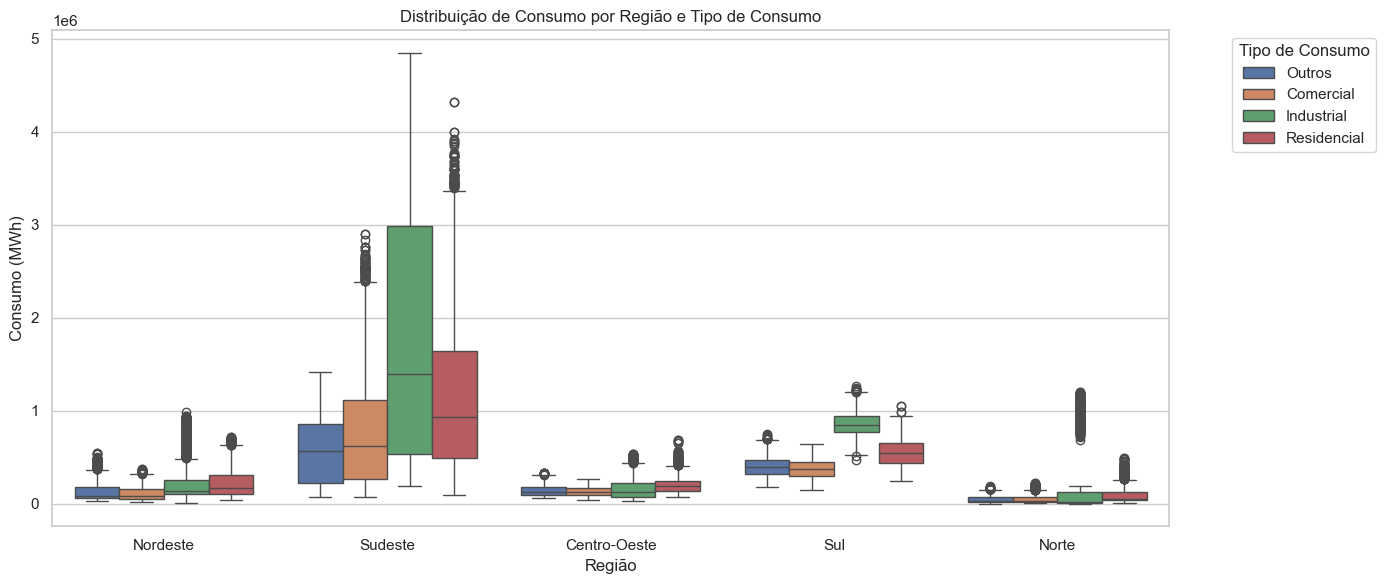

In [48]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='regiao', y='consumo', hue='tipo_consumo')
plt.title('Distribuição de Consumo por Região e Tipo de Consumo')
plt.xlabel('Região')
plt.ylabel('Consumo (MWh)')
plt.legend(title='Tipo de Consumo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Reflexão**

Sudeste: Tem os maiores valores de consumo, especialmente no setor industrial, com grande dispersão e muitos outliers. Isso indica que há unidades com consumo muito elevado, típico de grandes centros urbanos e industriais.

Nordeste, Centro-Oeste, Sul e Norte: Apresentam valores medianos e máximos de consumo menores. O Sul se destaca pelo consumo industrial e residencial relativamente alto em comparação com outras regiões, mas ainda bem abaixo do Sudeste.

Dispersão: O tamanho das caixas e a quantidade de outliers mostram que há grande variação no consumo dentro de cada tipo e região, principalmente no Sudeste.

Comparação entre tipos de consumo: O consumo industrial é o mais elevado e variável, especialmente no Sudeste. O consumo residencial, embora relevante, é menor e mais concentrado.

## Agrupamento de Perfis de Consumo com KMeans

### Aplicando K-Means Clustering para segmentar os dados em grupos com padrões regionais semelhantes de consumo, considerando variáveis como média, desvio padrão e tipo de consumo.

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Agregar dados por regiao + tipo_consumo
df_cluster = df.groupby(['regiao', 'tipo_consumo']).agg(
    media_consumo=('consumo', 'mean'),
    std_consumo=('consumo', 'std'),
    max_consumo=('consumo', 'max'),
    min_consumo=('consumo', 'min'),
    count=('consumo', 'count')
).reset_index()

# 2. Padronização (Z-score)
scaler = StandardScaler()
dados_numericos = df_cluster[['media_consumo', 'std_consumo', 'max_consumo', 'min_consumo']]
dados_normalizados = scaler.fit_transform(dados_numericos)

# 3. Aplicar K-Means
k = 3  # número de clusters (ajustável)
kmeans = KMeans(n_clusters=k, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(dados_normalizados)

# Ver resultado
print("Clusters atribuídos a cada grupo (região + tipo):")
display(df_cluster.sort_values(by='cluster'))

Clusters atribuídos a cada grupo (região + tipo):


,regiao,tipo_consumo,media_consumo,std_consumo,max_consumo,min_consumo,count,cluster
0,Centro-Oeste,Comercial,131316,46267,269035,42928,1008,0
17,Sul,Industrial,863126,143218,1267253,466790,756,0
16,Sul,Comercial,373561,104928,642466,142885,756,0
14,Sudeste,Outros,602105,382273,1421684,73459,965,0
11,Norte,Residencial,94570,88351,491806,12645,1764,0
10,Norte,Outros,48631,40509,193121,1394,1692,0
18,Sul,Outros,396104,113050,753216,177855,724,0
8,Norte,Comercial,50773,47058,218560,3894,1764,0
9,Norte,Industrial,166985,331144,1199295,354,1764,0
6,Nordeste,Outros,128715,97297,550020,30987,2177,0


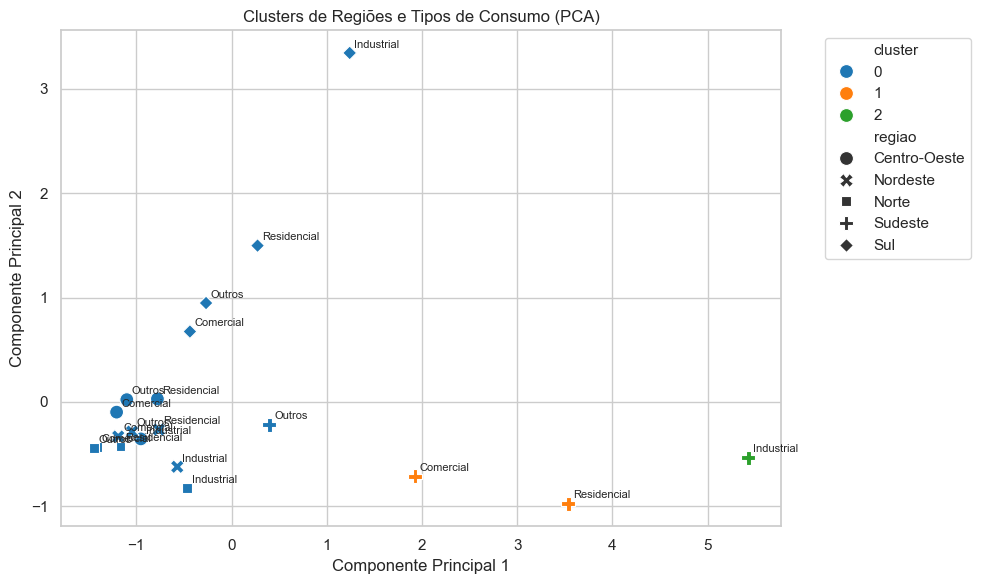

In [50]:
# Redução de dimensionalidade para visualização
pca = PCA(n_components=2)
componentes = pca.fit_transform(dados_normalizados)

# Adiciona ao DataFrame
df_cluster['pca1'] = componentes[:, 0]
df_cluster['pca2'] = componentes[:, 1]

# Plotagem
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cluster,
    x='pca1', y='pca2',
    hue='cluster',
    style='regiao',
    s=100,
    palette='tab10'
)
for _, row in df_cluster.iterrows():
    plt.text(row['pca1']+0.05, row['pca2']+0.05, f"{row['tipo_consumo']}", fontsize=8)

plt.title('Clusters de Regiões e Tipos de Consumo (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

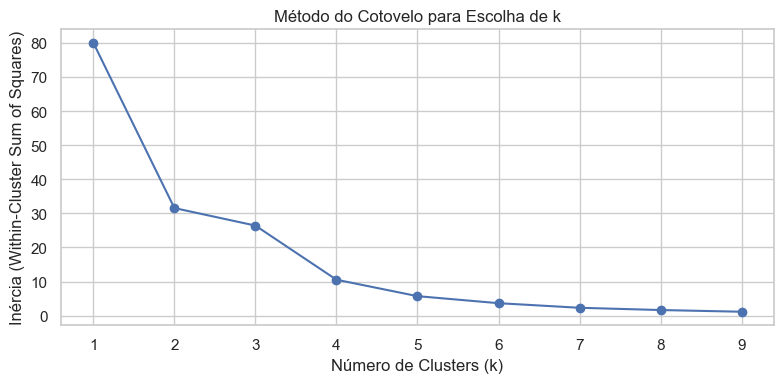

In [51]:
# Testar vários valores de k e plotar a inércia (soma das distâncias intra-cluster)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inercia = []
intervalo_k = range(1, 10)

for k in intervalo_k:
    modelo = KMeans(n_clusters=k, random_state=42)
    modelo.fit(dados_normalizados)
    inercia.append(modelo.inertia_)

# Gráfico do método do cotovelo
plt.figure(figsize=(8, 4))
plt.plot(intervalo_k, inercia, marker='o')
plt.title('Método do Cotovelo para Escolha de k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
# Reaplica KMeans com o valor de k escolhido (ex: k=4)
k_otimo = 4
modelo_kmeans = KMeans(n_clusters=k_otimo, random_state=42)
df_cluster['cluster'] = modelo_kmeans.fit_predict(dados_normalizados)

# Gerar um resumo de perfil por cluster
resumo_cluster = df_cluster.groupby('cluster')[['media_consumo', 'std_consumo', 'max_consumo', 'min_consumo']].mean().round(2)
display(resumo_cluster)

# Adiciona uma coluna com descrição textual do perfil
def descrever_cluster(row):
    if row['cluster'] == 0:
        return 'Consumo médio baixo e variância baixa'
    elif row['cluster'] == 1:
        return 'Consumo médio alto e alta dispersão'
    elif row['cluster'] == 2:
        return 'Consumo intermediário com variação moderada'
    else:
        return 'Cluster com extremos (máximo/mínimo amplos)'

df_cluster['perfil_cluster'] = df_cluster.apply(descrever_cluster, axis=1)

# Visualizar agrupamentos rotulados
display(df_cluster[['regiao', 'tipo_consumo', 'cluster', 'perfil_cluster']].sort_values(by='cluster'))

,media_consumo,std_consumo,max_consumo,min_consumo
cluster,,,,
0,192721,137471,615340,38268
1,1080299,946050,3611060,85177
2,1969934,1559831,4849895,186944
3,603248,136791,1022981,298178


,regiao,tipo_consumo,cluster,perfil_cluster
0,Centro-Oeste,Comercial,0,Consumo médio baixo e variância baixa
16,Sul,Comercial,0,Consumo médio baixo e variância baixa
14,Sudeste,Outros,0,Consumo médio baixo e variância baixa
11,Norte,Residencial,0,Consumo médio baixo e variância baixa
10,Norte,Outros,0,Consumo médio baixo e variância baixa
8,Norte,Comercial,0,Consumo médio baixo e variância baixa
7,Nordeste,Residencial,0,Consumo médio baixo e variância baixa
9,Norte,Industrial,0,Consumo médio baixo e variância baixa
5,Nordeste,Industrial,0,Consumo médio baixo e variância baixa
4,Nordeste,Comercial,0,Consumo médio baixo e variância baixa


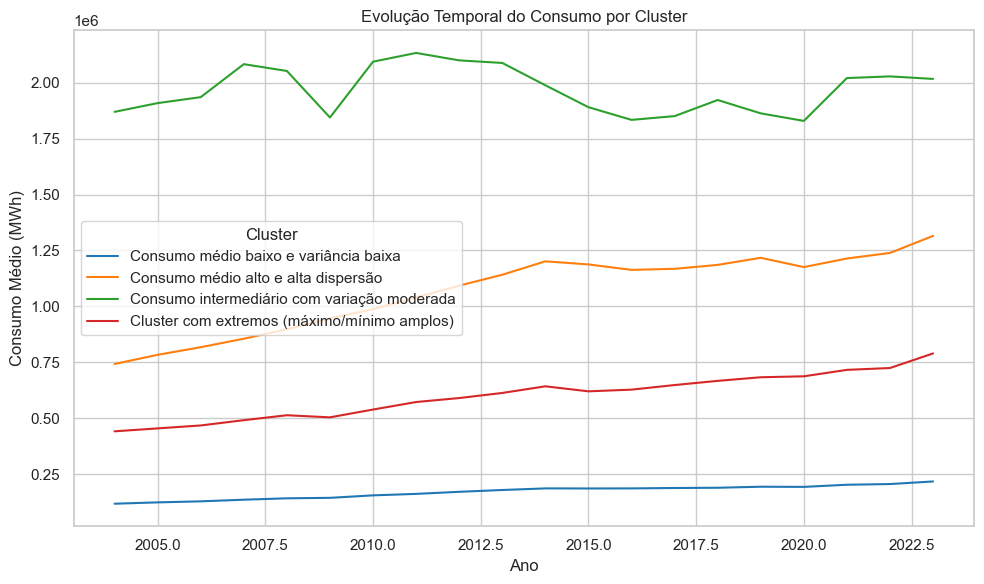

In [53]:
# Associar cada linha original ao cluster baseado em regiao + tipo_consumo
df_completo_cluster = df.merge(
    df_cluster[['regiao', 'tipo_consumo', 'cluster', 'perfil_cluster']],
    on=['regiao', 'tipo_consumo'],
    how='left'
)

# Agregar consumo médio por cluster ao longo dos anos
df_ano_cluster = df_completo_cluster.groupby(['ano', 'cluster', 'perfil_cluster'])['consumo'].mean().reset_index()

# Visualização: evolução de consumo médio por cluster ao longo dos anos
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ano_cluster, x='ano', y='consumo', hue='perfil_cluster', palette='tab10')
plt.title('Evolução Temporal do Consumo por Cluster')
plt.xlabel('Ano')
plt.ylabel('Consumo Médio (MWh)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

**Reflexão**

Clusters mais intensivos podem ter crescimento mais rápido (ex: industrial em Sudeste)

Clusters mais voláteis podem oscilar ao longo dos anos

Pode-se observar mudanças estruturais, como aumento do cluster residencial pós-pandemia, ou crescimento industrial no Centro-Oeste

## Modelagem Preditiva com Regressão Linear e Random Forest


### Prever o valor de consumo (MWh), a partir de variáveis como ano, estado, regiao, tipo_consumo, e cluster.
**Etapas**
1. Preparar dados (features + target)
2. Codificar variáveis categóricas
3. Dividir entre treino/teste
4. Treinar modelo de regressão (Random Forest)
5. Avaliar performance
6. Visualização Previsto x Real e Resíduos
7. Interpretar variáveis mais importantes

#### 1–2. Preparação e Codificação

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Merge dos clusters com df completo
df_modelo = df.merge(
    df_cluster[['regiao', 'tipo_consumo', 'cluster']],
    on=['regiao', 'tipo_consumo'],
    how='left'
)

# Features e target
X = df_modelo[['ano', 'estado', 'regiao', 'tipo_consumo', 'cluster']]
y = df_modelo['consumo']

# Codificação de variáveis categóricas
colunas_cat = ['estado', 'regiao', 'tipo_consumo']
colunas_num = ['ano', 'cluster']

preprocessador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), colunas_cat)
    ],
    remainder='passthrough'  # mantém colunas numéricas
)


#### 3–4. Treinamento do Modelo

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: preprocessamento + modelo
pipeline = Pipeline(steps=[
    ('preprocessamento', preprocessador),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Treinar
pipeline.fit(X_train, y_train)

,steps,"[('preprocessamento', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### 5. Avaliação do Modelo

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Previsão
y_pred = pipeline.predict(X_test)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f} MWh")
print(f"RMSE: {rmse:.2f} MWh")
print(f"R²:   {r2:.4f}")

MAE:  18060.37 MWh
RMSE: 38445.39 MWh
R²:   0.9960


#### 6. Visualização Previsto x Real e Resíduos

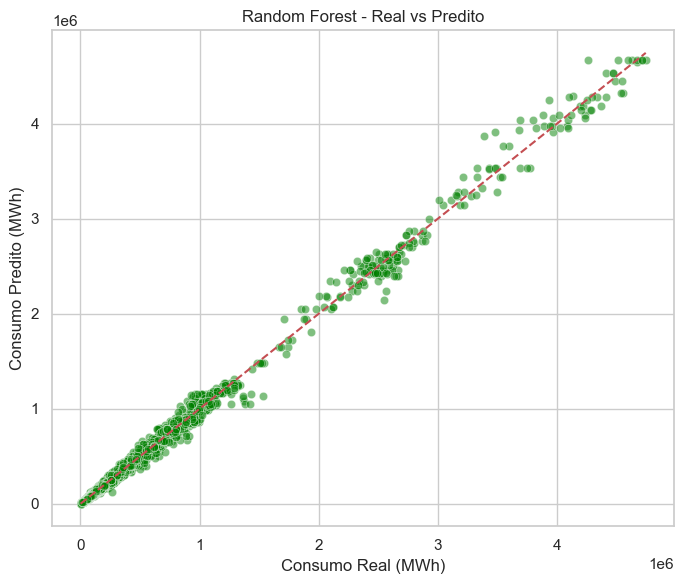

In [57]:
# Visualização dos resultados 
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # linha ideal
plt.xlabel('Consumo Real (MWh)')
plt.ylabel('Consumo Predito (MWh)')
plt.title('Random Forest - Real vs Predito')
plt.tight_layout()
plt.show()

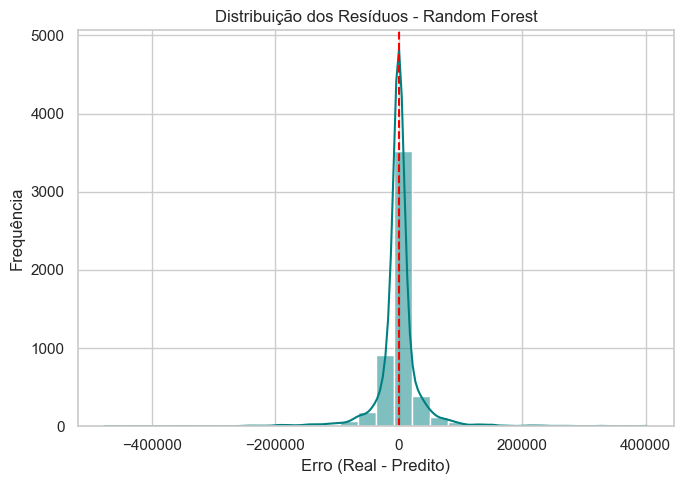

In [58]:
# Análise dos resíduos
residuos_rf = y_test - y_pred

plt.figure(figsize=(7, 5))
sns.histplot(residuos_rf, kde=True, bins=30, color='teal')
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribuição dos Resíduos - Random Forest')
plt.xlabel('Erro (Real - Predito)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

####  7. Interpretação das variáveis importantes

/var/folders/jj/rt8x6d5n2q3fxbzf3d4q_mqw0000gp/T/ipykernel_35649/116896802.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importancia, x='importancia', y='feature', palette='viridis')


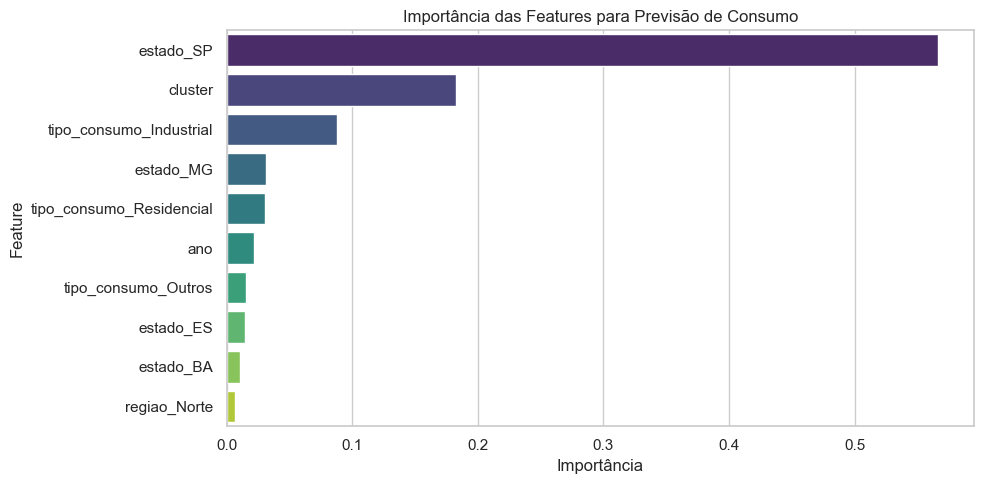

In [59]:
# Extrai pipeline componentes
preprocessor = pipeline.named_steps['preprocessamento']
modelo_treinado = pipeline.named_steps['regressor']

# Extrai os nomes das colunas categóricas (one-hot)
categorical_features = preprocessor.transformers_[0][1].get_feature_names_out(colunas_cat)

# Concatena com as colunas numéricas (que foram passadas como passthrough)
nome_features = list(categorical_features) + colunas_num

importancia = modelo_treinado.feature_importances_

df_importancia = pd.DataFrame({
    'feature': nome_features,
    'importancia': importancia
}).sort_values(by='importancia', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=df_importancia, x='importancia', y='feature', palette='viridis')
plt.title('Importância das Features para Previsão de Consumo')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Reflexão**

O modelo pode ser usado para previsão futura de consumo em um estado/região/tipo.

Ano, tipo_consumo e cluster devem aparecer como variáveis altamente preditivas.

Pode ser usado para detectar desvios (anomalias) entre previsão e valor real no futuro.

## Treinando modelo de Regressão Linear como alternativa ao Random Forest e comparar suas métricas de desempenho (MAE, RMSE, R²).

**Etapas para comparação**
- Usar o mesmo pipeline de pré-processamento
- Substituir o modelo por LinearRegression
- Treinar, prever e avaliar
- Visualizar resultado
- Comparar com Random Forest

#### 1. Importar e montar pipeline com LinearRegression

In [60]:
from sklearn.linear_model import LinearRegression

# Montar pipeline com Linear Regression
pipeline_lr = Pipeline(steps=[
    ('preprocessamento', preprocessador),
    ('regressor', LinearRegression())
])

# Treinar
pipeline_lr.fit(X_train, y_train)

,steps,"[('preprocessamento', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


####  2. Avaliar performance da regressão linear

In [61]:
# Prever
y_pred_lr = pipeline_lr.predict(X_test)

# Avaliar
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Modelo: Regressão Linear")
print(f"MAE:  {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²:   {r2_lr:.4f}")

Modelo: Regressão Linear
MAE:  153684.02
RMSE: 266157.85
R²:   0.8070


#### 3. Visualizar resultado

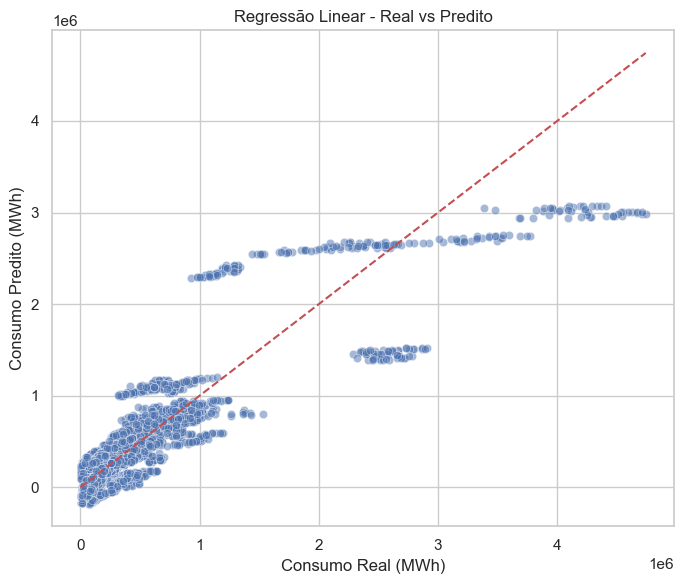

In [62]:
# Visualização dos resultados da Regressão Linear
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # linha ideal
plt.xlabel('Consumo Real (MWh)')
plt.ylabel('Consumo Predito (MWh)')
plt.title('Regressão Linear - Real vs Predito')
plt.tight_layout()
plt.show()

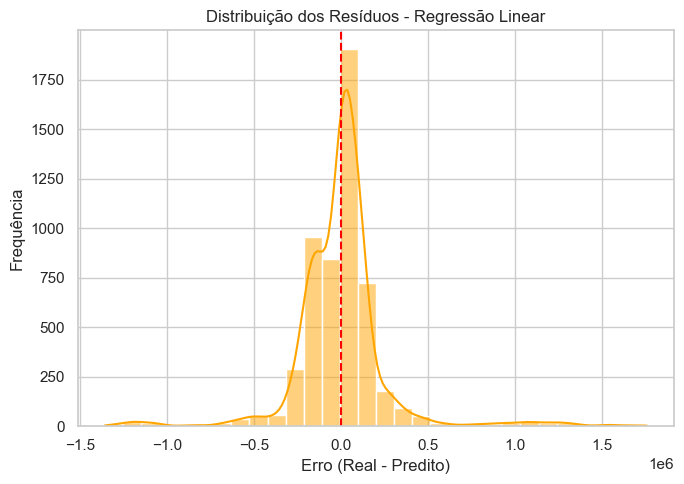

In [63]:
# Análise dos resíduos da Regressão Linear
residuos = y_test - y_pred_lr

plt.figure(figsize=(7, 5))
sns.histplot(residuos, kde=True, bins=30, color='orange')
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribuição dos Resíduos - Regressão Linear')
plt.xlabel('Erro (Real - Predito)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

#### 4. Comparação com Random Forest

In [64]:
# Já tínhamos as métricas do Random Forest (use as mesmas variáveis)
print("\nComparação de Modelos:")

print(f"{'Métrica':<10} | {'RandomForest':>12} | {'LinearReg':>10}")
print("-" * 38)
print(f"{'MAE':<10} | {mae:.2f}{' ':>6}       | {mae_lr:.2f}")
print(f"{'RMSE':<10} | {rmse:.2f}{' ':>6}       | {rmse_lr:.2f}")
print(f"{'R²':<10} | {r2:.4f}               | {r2_lr:.4f}")


Comparação de Modelos:
Métrica    | RandomForest |  LinearReg
--------------------------------------
MAE        | 18060.37             | 153684.02
RMSE       | 38445.39             | 266157.85
R²         | 0.9960               | 0.8070


**Reflexão**

O Random Forest demonstra performance significativamente superior em todas as métricas, sugerindo que o problema possui relações não-lineares complexas que a Regressão Linear não consegue capturar adequadamente.

**Observação**

Considerando que os valores de erro estão na casa das dezenas de milhares, parece ser um problema de regressão com valores altos.

**Próximo Passo**

A distribuição dos dados parece violar premissas da regressão linear. Uma transformação (log ou Box-Cox) pode corrigir para uma distribuição normal.

## Transformando com BoxCox para normalizar os dados antes de treinar o modelo Regressão Linear para comparativo

In [65]:
from sklearn.preprocessing import PowerTransformer

# Ajustar PowerTransformer para y_train (Box-Cox)
# Adiciona 1 para garantir positividade caso haja zeros
pt = PowerTransformer(method='box-cox')
y_train_bc = pt.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Montar pipeline com Linear Regression com box-cox
pipeline_lr_bc = Pipeline(steps=[
    ('preprocessamento', preprocessador),
    ('regressor', LinearRegression())
])

# Treinar com y transformado
pipeline_lr_bc.fit(X_train, y_train_bc)

# Prever (resultado na escala transformada)
y_pred_bc = pipeline_lr_bc.predict(X_test)

# Inverter transformação para escala original
y_pred_inverse_bc = pt.inverse_transform(y_pred_bc.reshape(-1, 1)).flatten()

# Avaliar no espaço original
mae_lr_bc = mean_absolute_error(y_test, y_pred_inverse_bc)
rmse_lr_bc = np.sqrt(mean_squared_error(y_test, y_pred_inverse_bc))
r2_lr_bc = r2_score(y_test, y_pred_inverse_bc)

print("Modelo: Regressão Linear com Box-Cox na variável target")
print(f"MAE:  {mae_lr_bc:.2f}")
print(f"RMSE: {rmse_lr_bc:.2f}")
print(f"R²:   {r2_lr_bc:.4f}")

Modelo: Regressão Linear com Box-Cox na variável target
MAE:  96960.73
RMSE: 244118.73
R²:   0.8377


In [66]:
# Comparação Random Forest, Regressão Linear e Regressão Linear com Box-Cox
print("\nComparação de Modelos:")

print(f"{'Métrica':<10} | {'RandomForest':>12} | {'LinearReg':>10}| {'LinearRegBoxCox':>10}")
print("-" * 50)
print(f"{'MAE':<10} | {mae:.2f}{' ':>6}       | {mae_lr:.2f}       | {mae_lr_bc:.2f}")
print(f"{'RMSE':<10} | {rmse:.2f}{' ':>6}       | {rmse_lr:.2f}       | {rmse_lr_bc:.2f}")
print(f"{'R²':<10} | {r2:.4f}               | {r2_lr:.4f}          | {r2_lr_bc:.4f}")


Comparação de Modelos:
Métrica    | RandomForest |  LinearReg| LinearRegBoxCox
--------------------------------------------------
MAE        | 18060.37             | 153684.02       | 96960.73
RMSE       | 38445.39             | 266157.85       | 244118.73
R²         | 0.9960               | 0.8070          | 0.8377


**Reflexão**

Tivemos uma melhora no resultado podendo ser considerado satisfatório levando em conta um cenário onde o máximo de precisão não é exigida em detrimento de uma melhor interpretação do resultado. Caso contrário Random Forest apresenta um resultado melhor final.